In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [2]:
from sklearn import datasets

In [3]:
labels = ['b', 'r']
X, y = datasets.make_moons(n_samples=500, noise=0.15, random_state=42)
y = np.take(labels, (y < 0.5))

([], <a list of 0 Text yticklabel objects>)

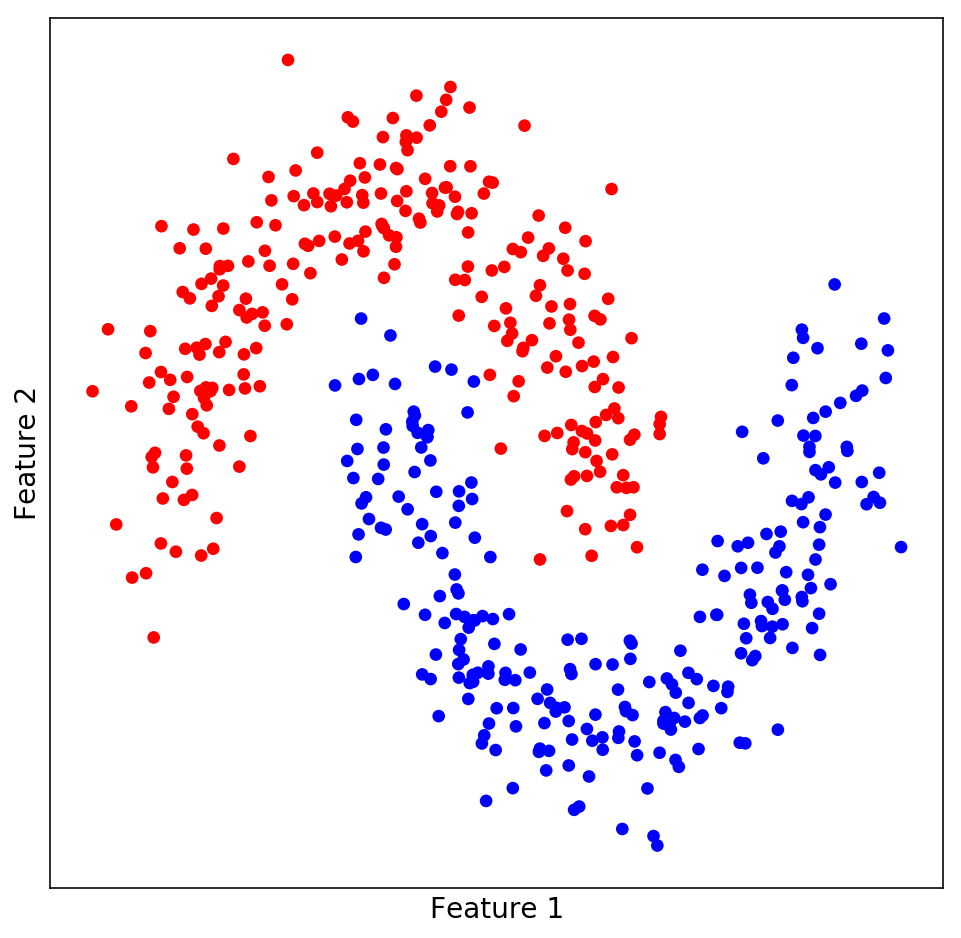

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

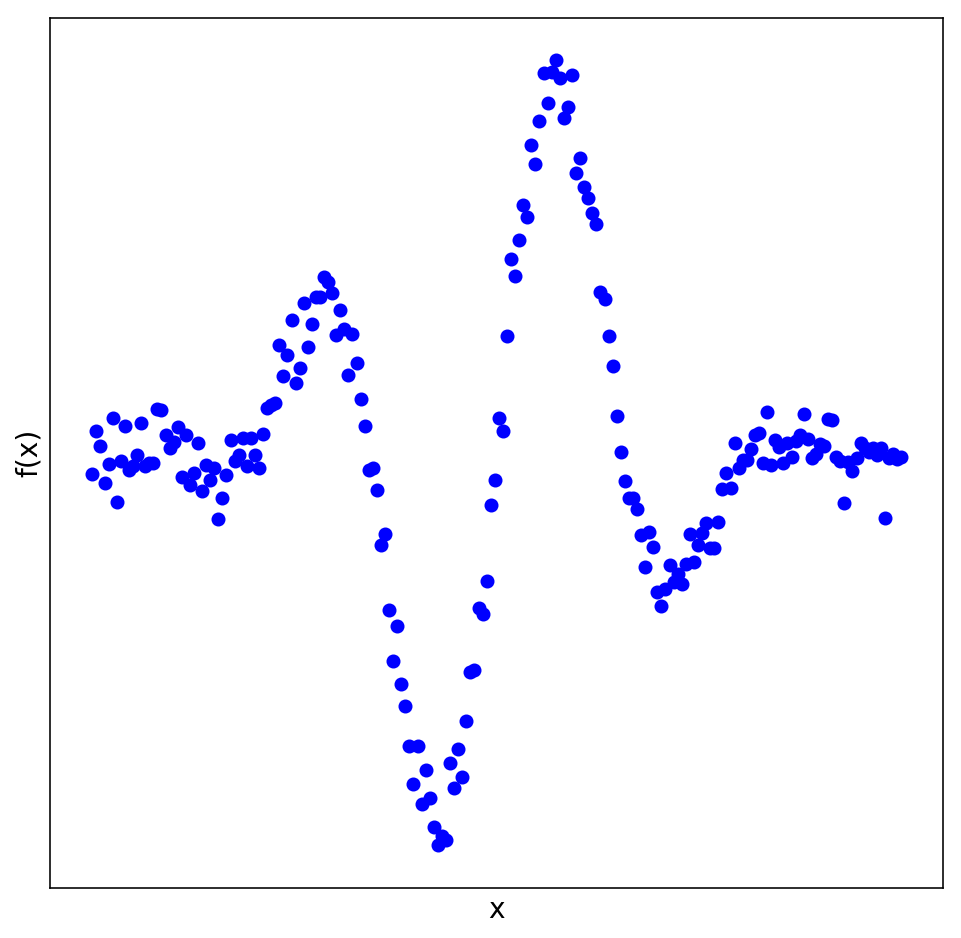

In [5]:
x = np.linspace(-2, 2, 200).reshape(-1, 1)
line = np.linspace(-2, 2, 200).reshape(-1, 1)
def f(x, noise_level=0.05):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

y = np.array([f(x_) for x_ in x])

plt.scatter(x, y, c='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

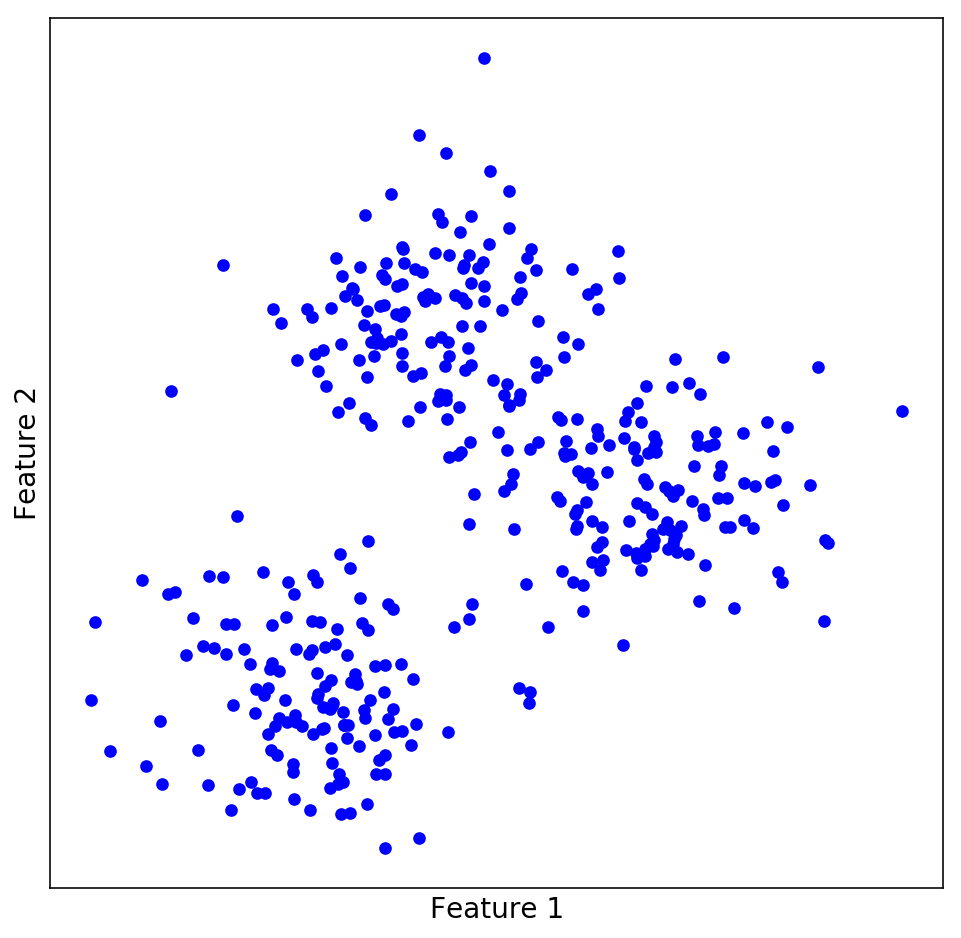

In [6]:
labels = ["b", "r"]
X, y = datasets.make_blobs(n_samples=400, centers=3, random_state=42, cluster_std=2.9)

plt.scatter(X[:, 0], X[:, 1], c='b', lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

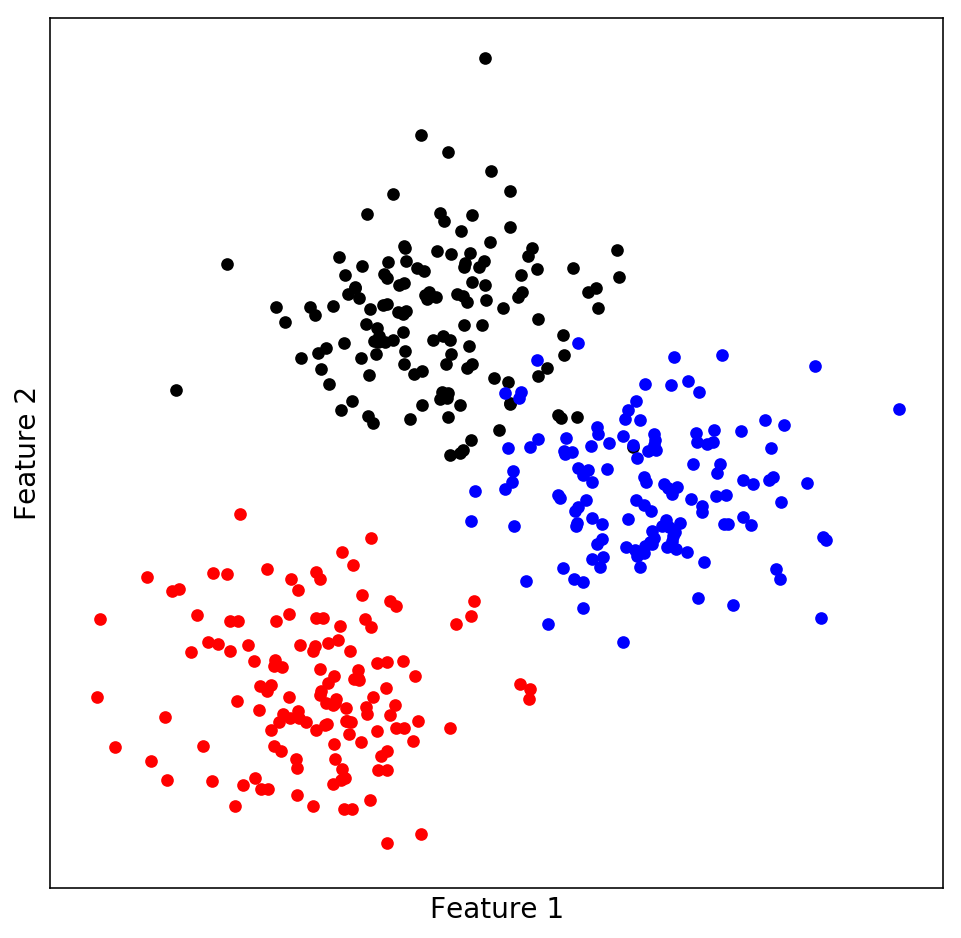

In [7]:
for n,label in enumerate(('k', 'b', 'r')):
    mask = np.where(y==n)
    plt.scatter(X[mask, 0], X[mask, 1], c=label, lw=0, s=40)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(())
plt.yticks(())

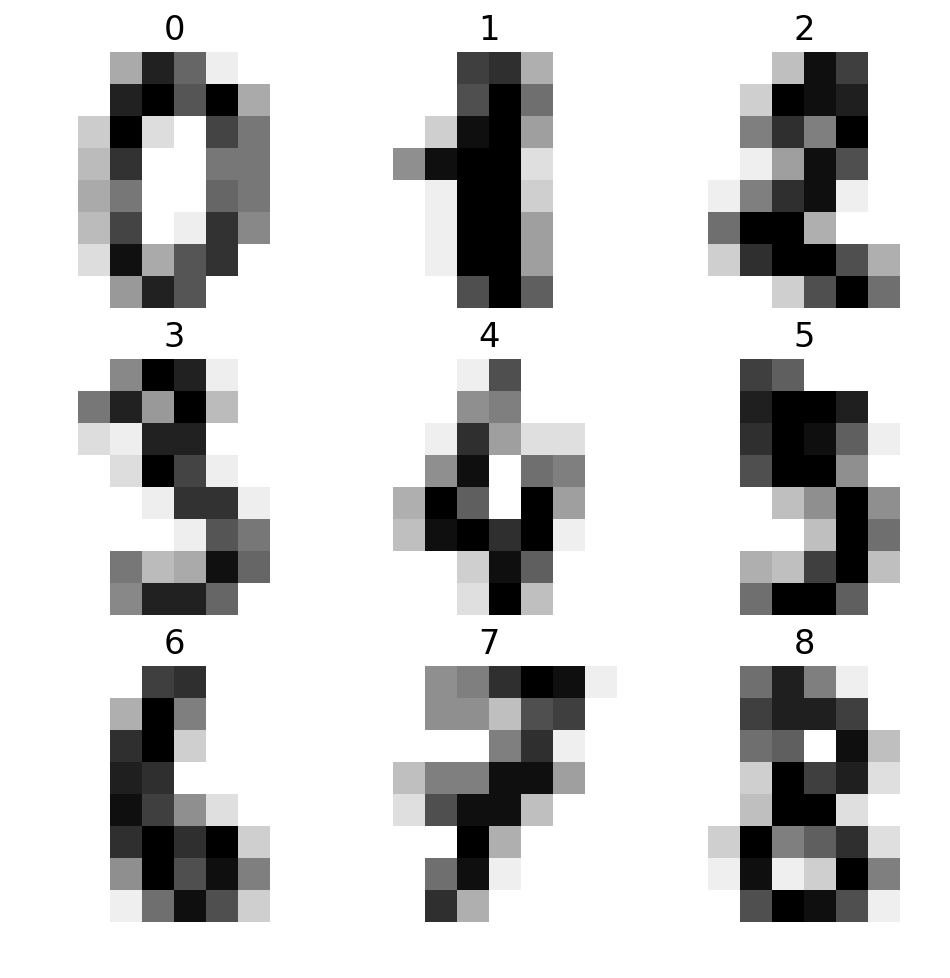

In [8]:
from sklearn import datasets

digits = datasets.load_digits()

images_and_labels = zip(digits.images, digits.target)
for n, (image, label) in enumerate(images_and_labels):
    if n >= 3*3:
        break
    plt.subplot(3, 3, n + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
X, y = boston.data, boston.target

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

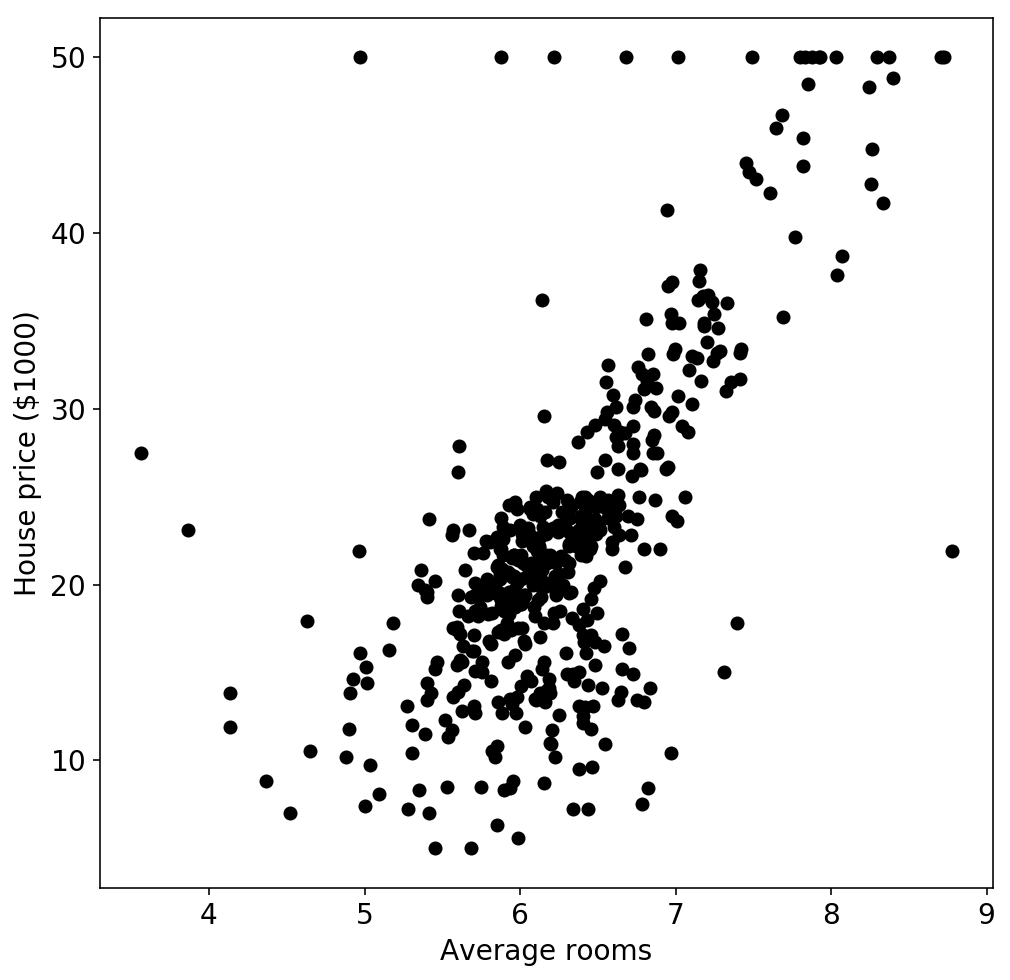

In [12]:
plt.plot(X[:, 5], y, 'ko')
plt.xlabel("Average rooms")
plt.ylabel("House price ($1000)")

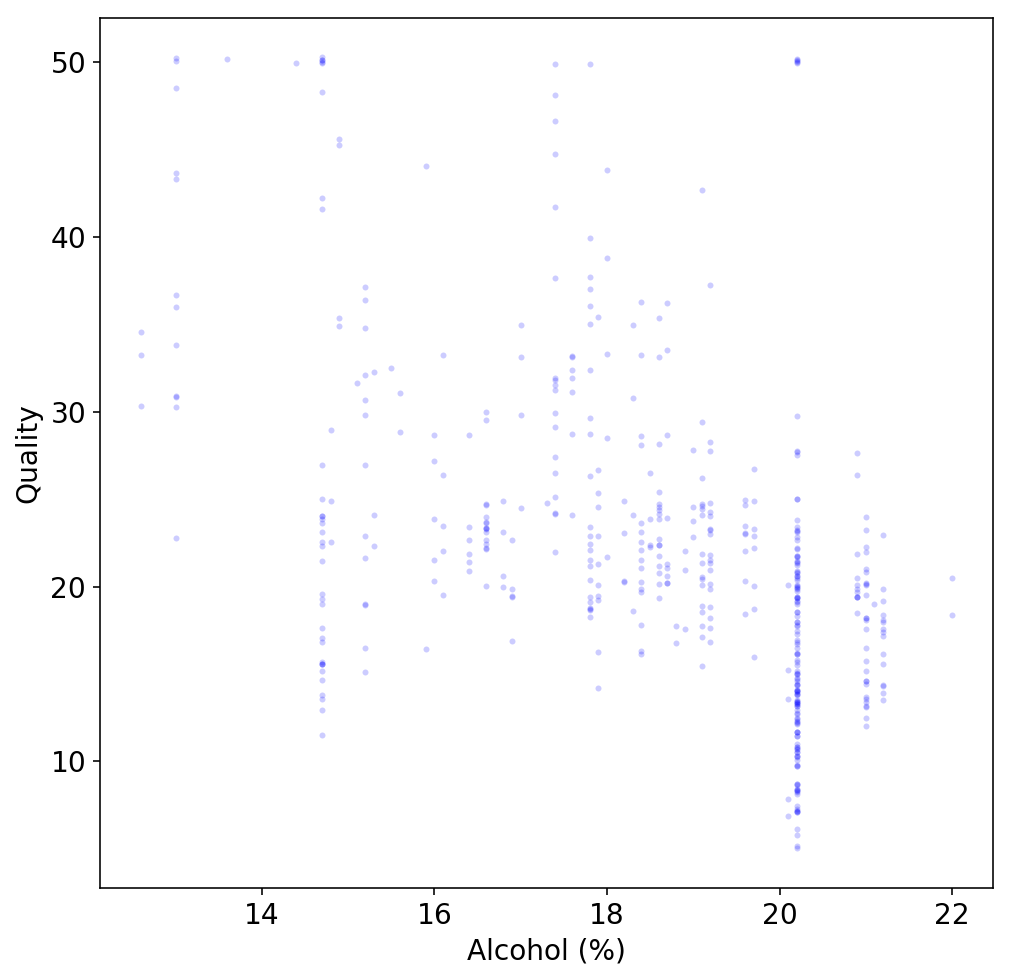

In [13]:
plt.scatter(X[:,10], y+np.random.normal(scale=0.15, size=len(y)),
            c='b', marker='.', alpha=0.15+0.05, lw=0)

plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')

In [14]:
from sklearn.datasets import make_blobs

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

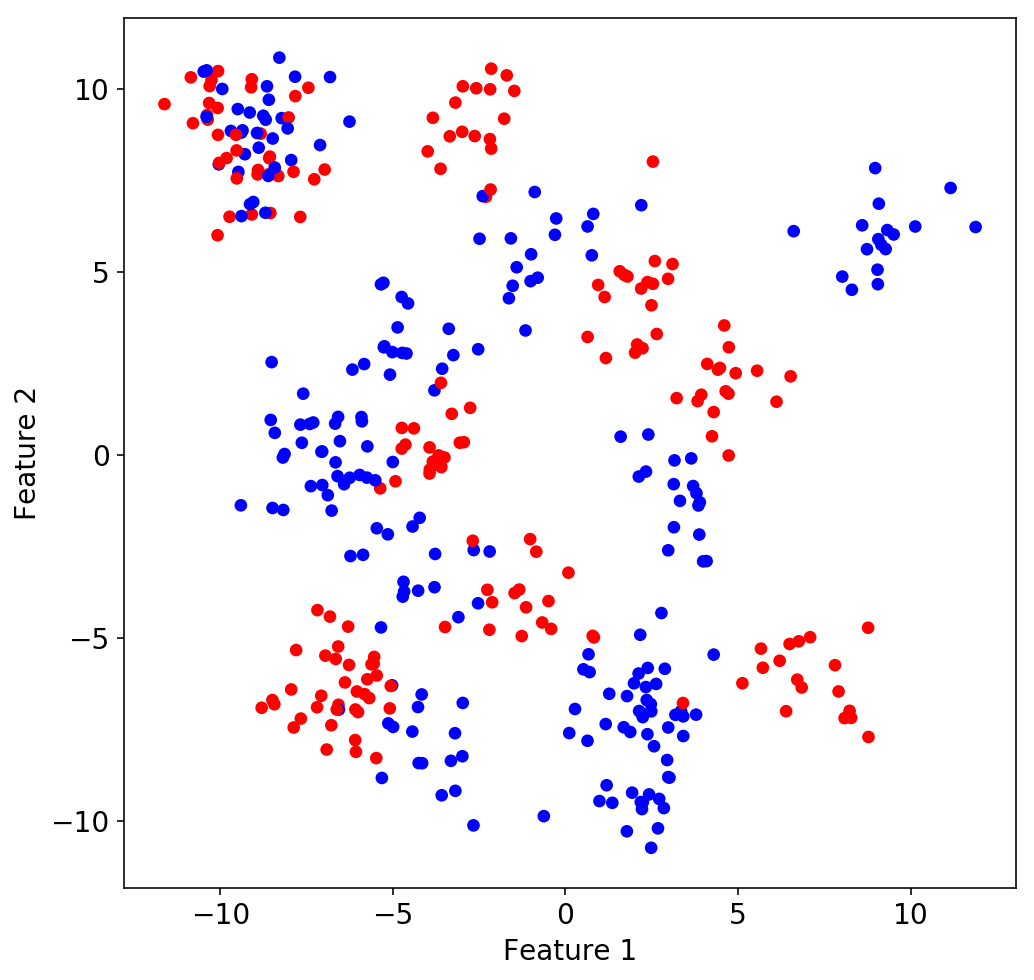

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

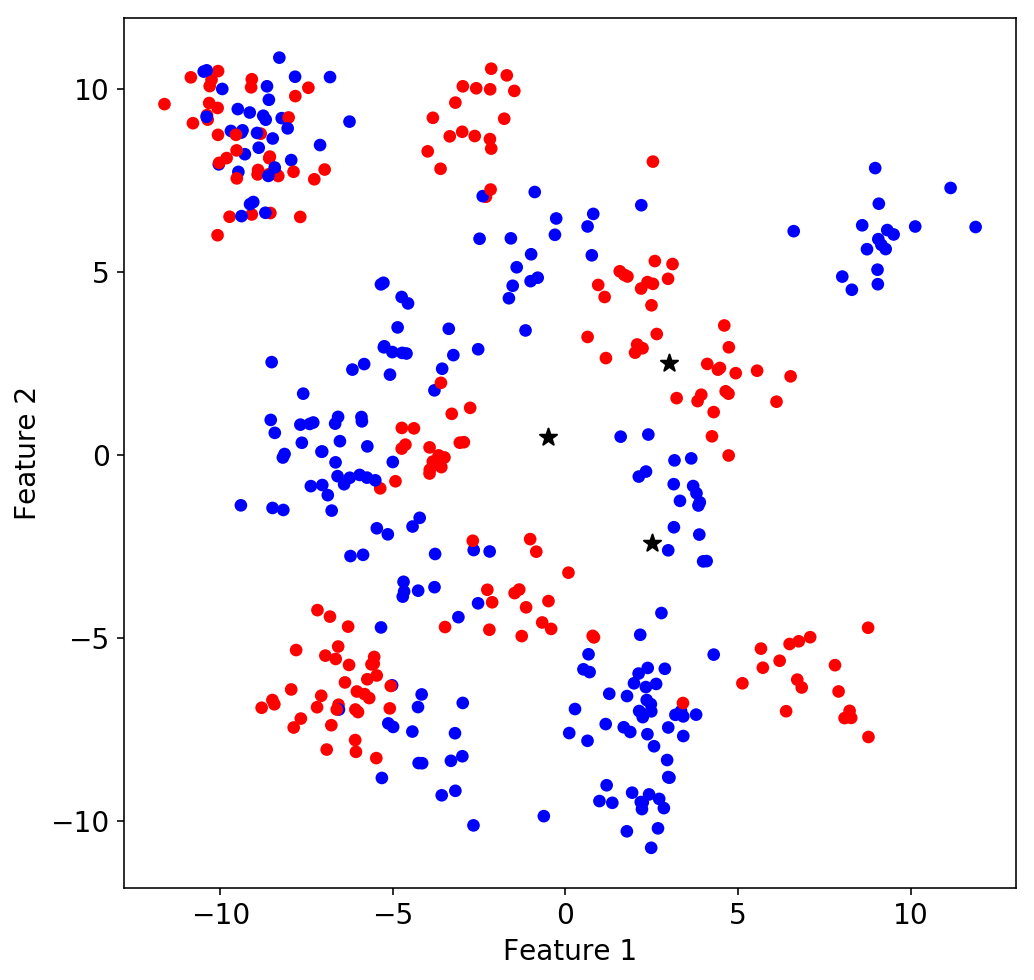

In [16]:
X_test = np.array([[2.5, -2.4], [3., +2.5], [-.5, .5]])

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='*', c='k', s=80)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

print(clf.predict(X_test))

['b' 'r' 'b']


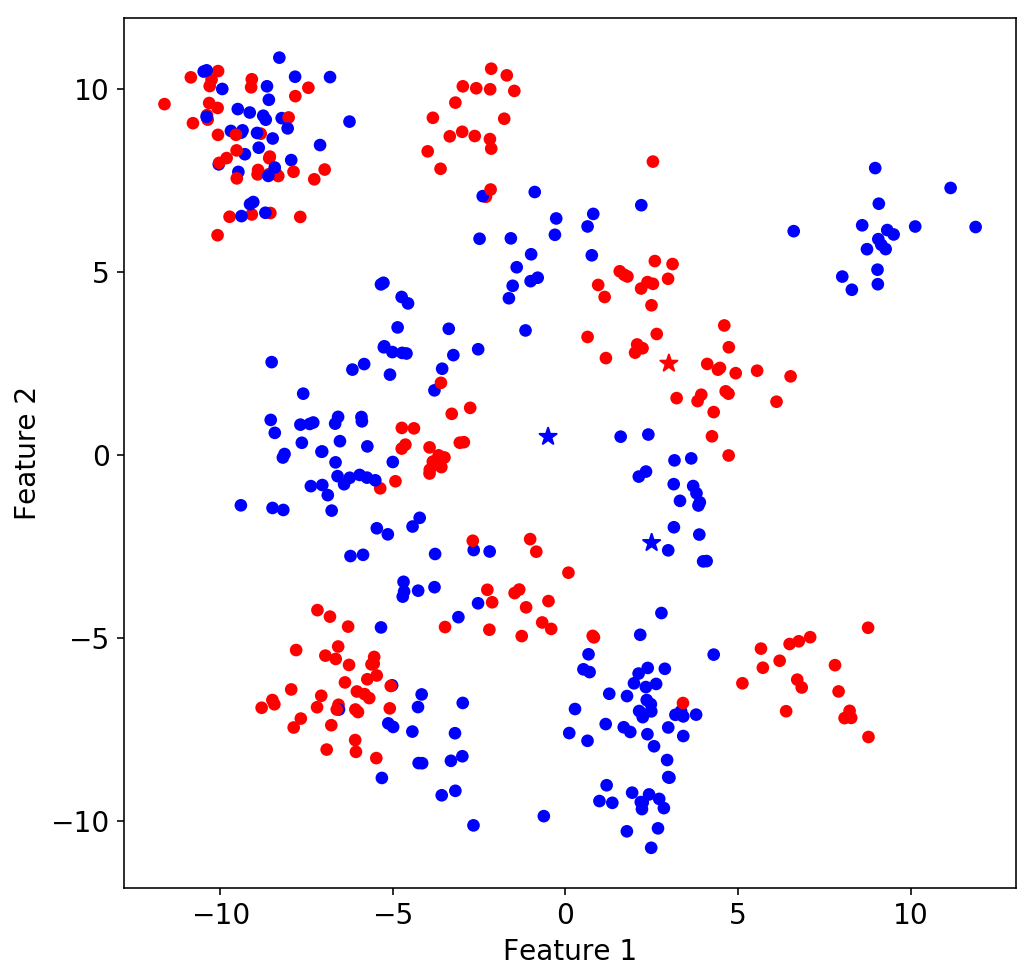

In [18]:
X_test = np.array([[2.5, -2.4], [3., +2.5], [-.5, .5]])

classes = clf.predict(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='*',
            c=classes, s=80)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

for k in (1, 10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    print('k=%i' % k, 'training accuracy:', clf.score(X_train, y_train))
    print('k=%i' % k, 'training accuracy:', clf.score(X_test, y_test))

k=1 training accuracy: 1.0
k=1 training accuracy: 0.85
k=10 training accuracy: 0.903333333333
k=10 training accuracy: 0.84


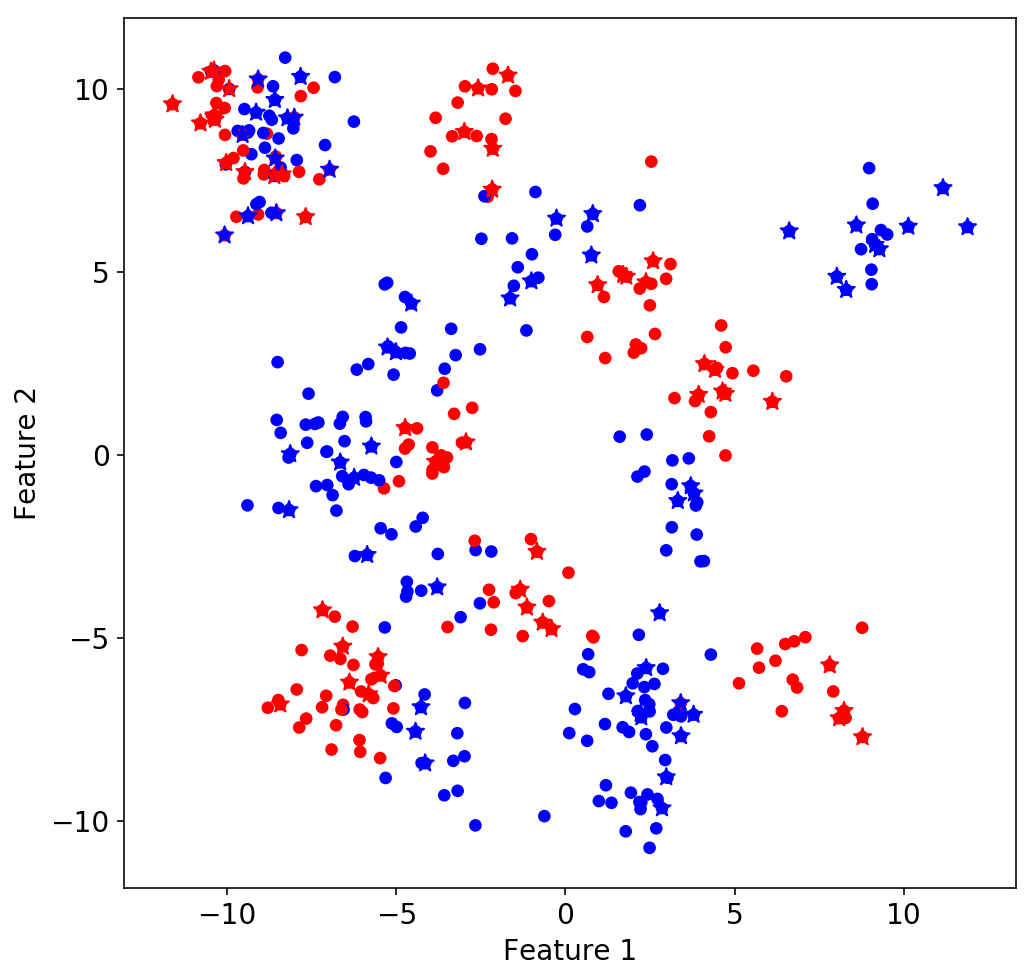

In [20]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X, y)

classes = clf.predict(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='*',
            c=classes, s=80)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

In [21]:
import utils

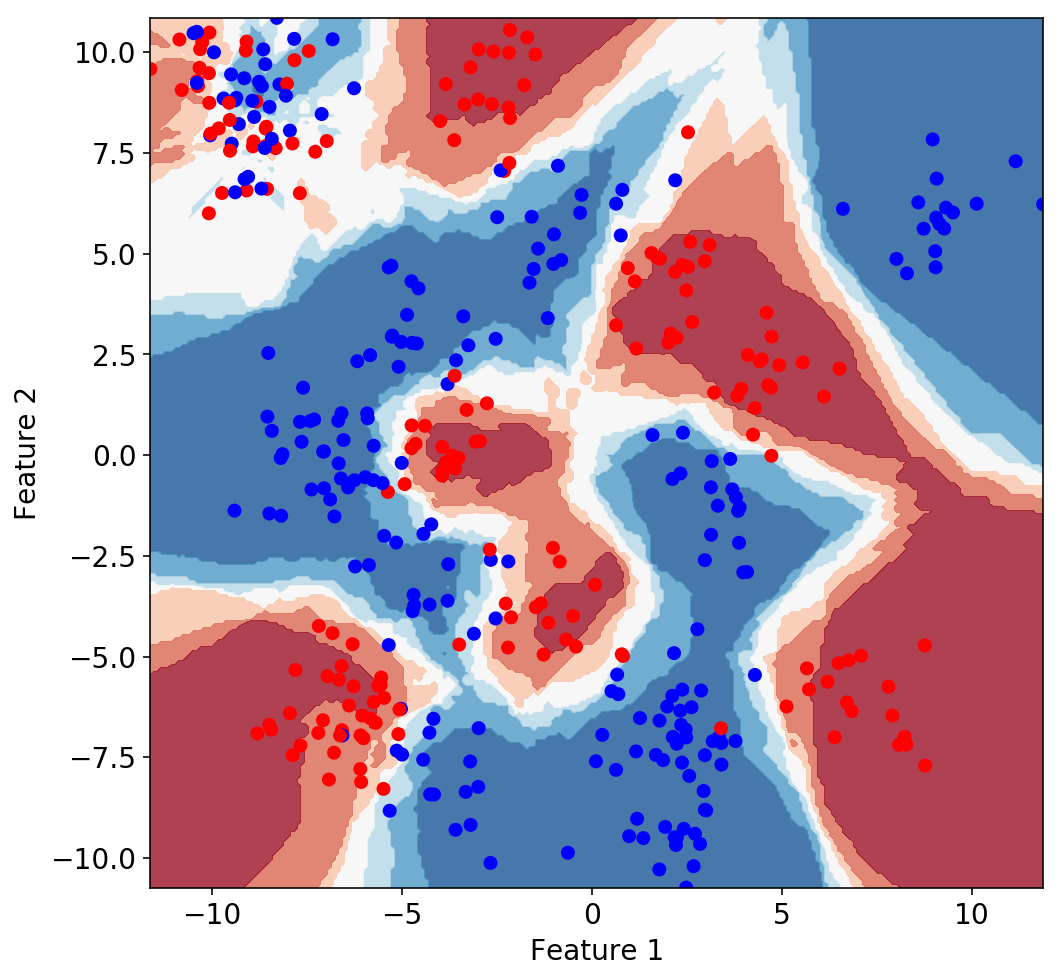

In [22]:
utils.plot_surface(clf, X, y, show=False)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

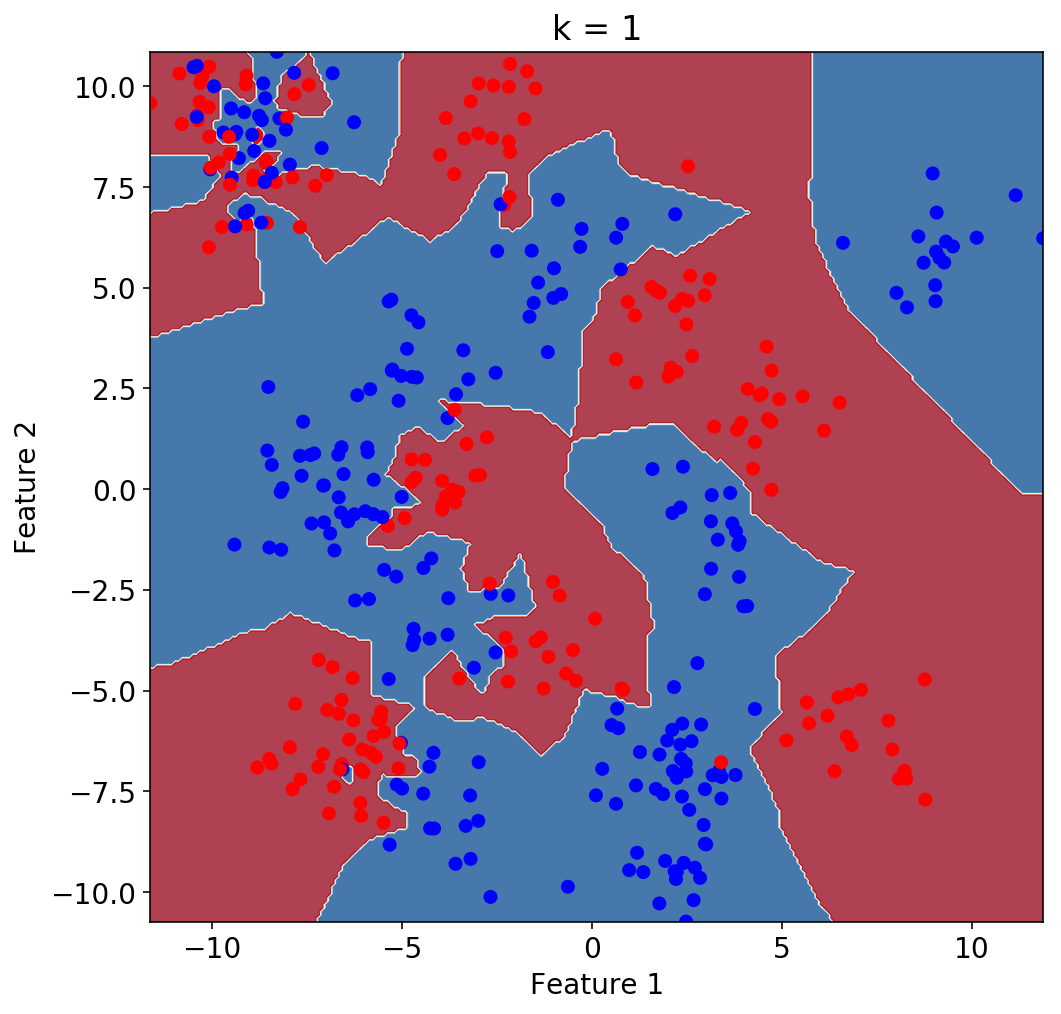

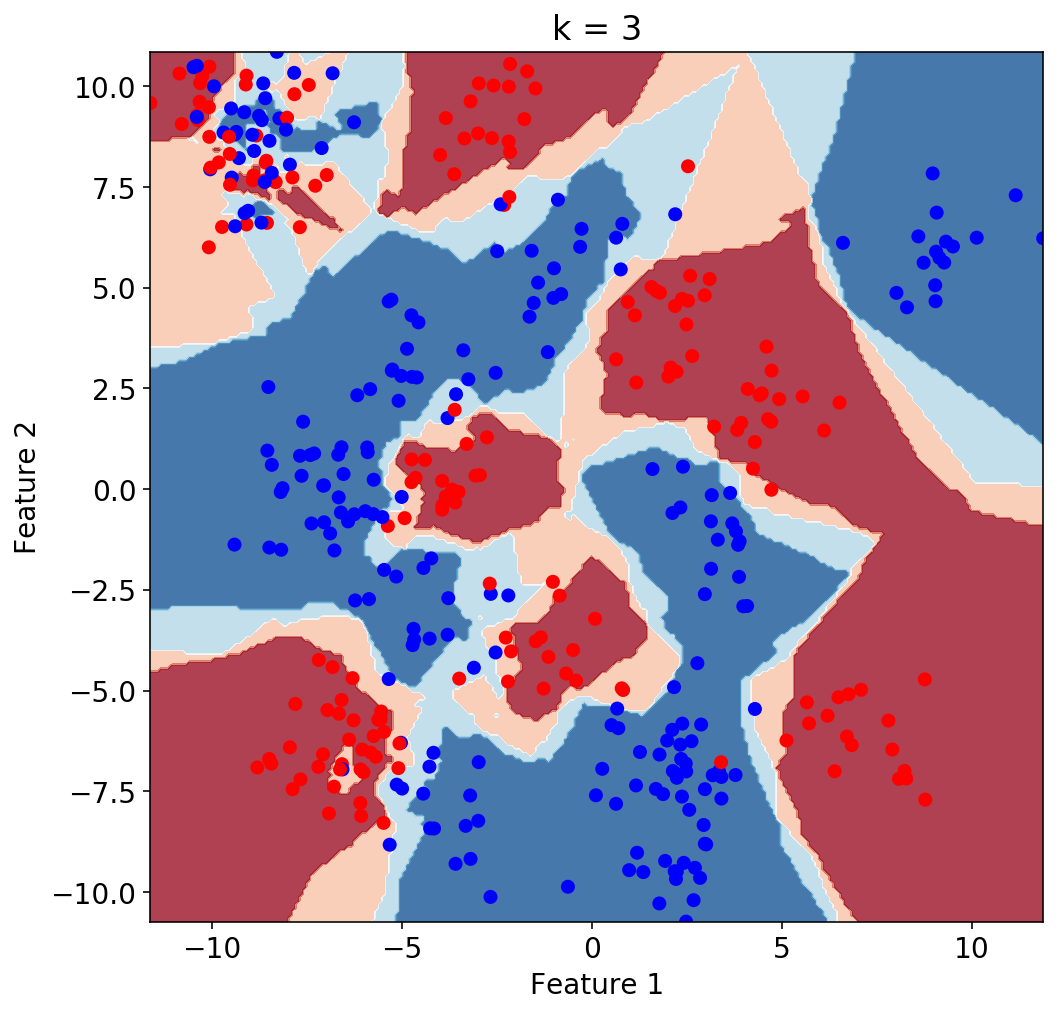

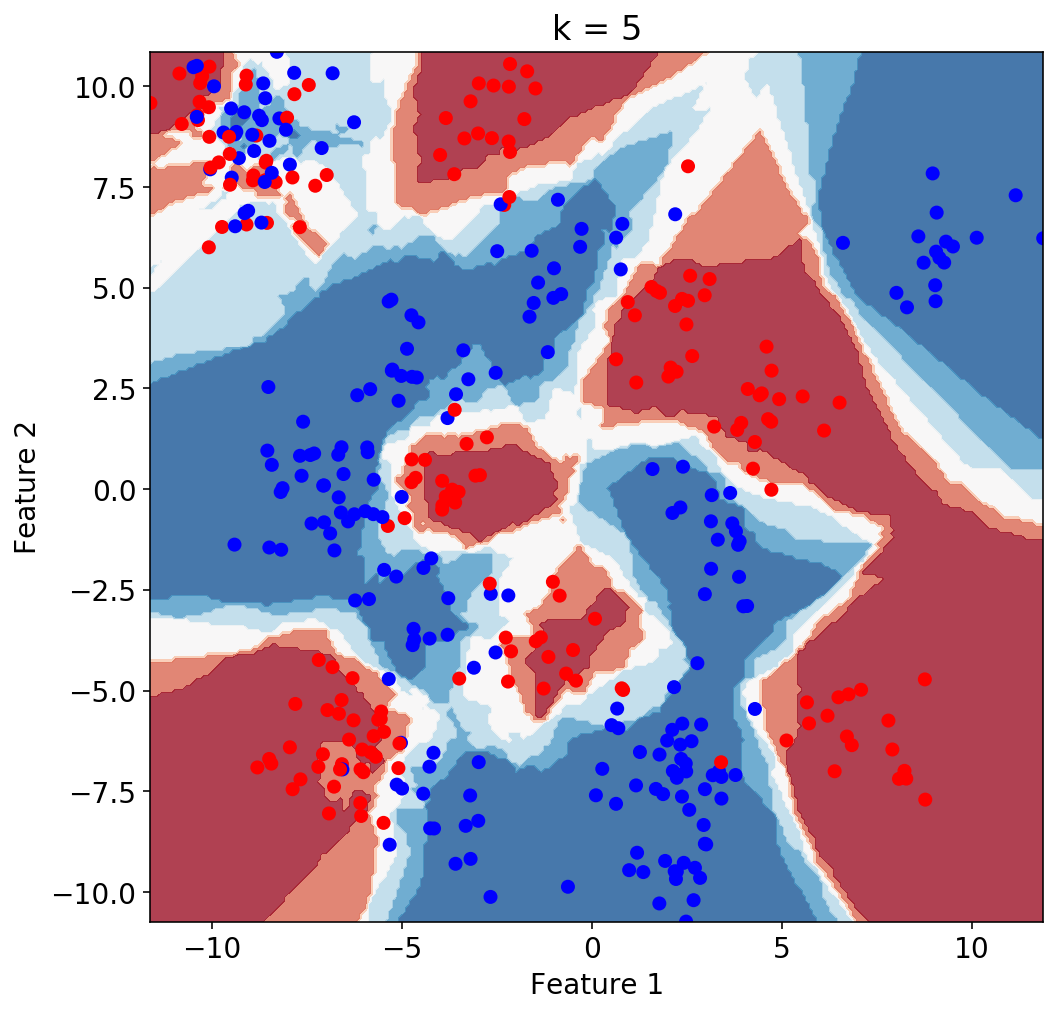

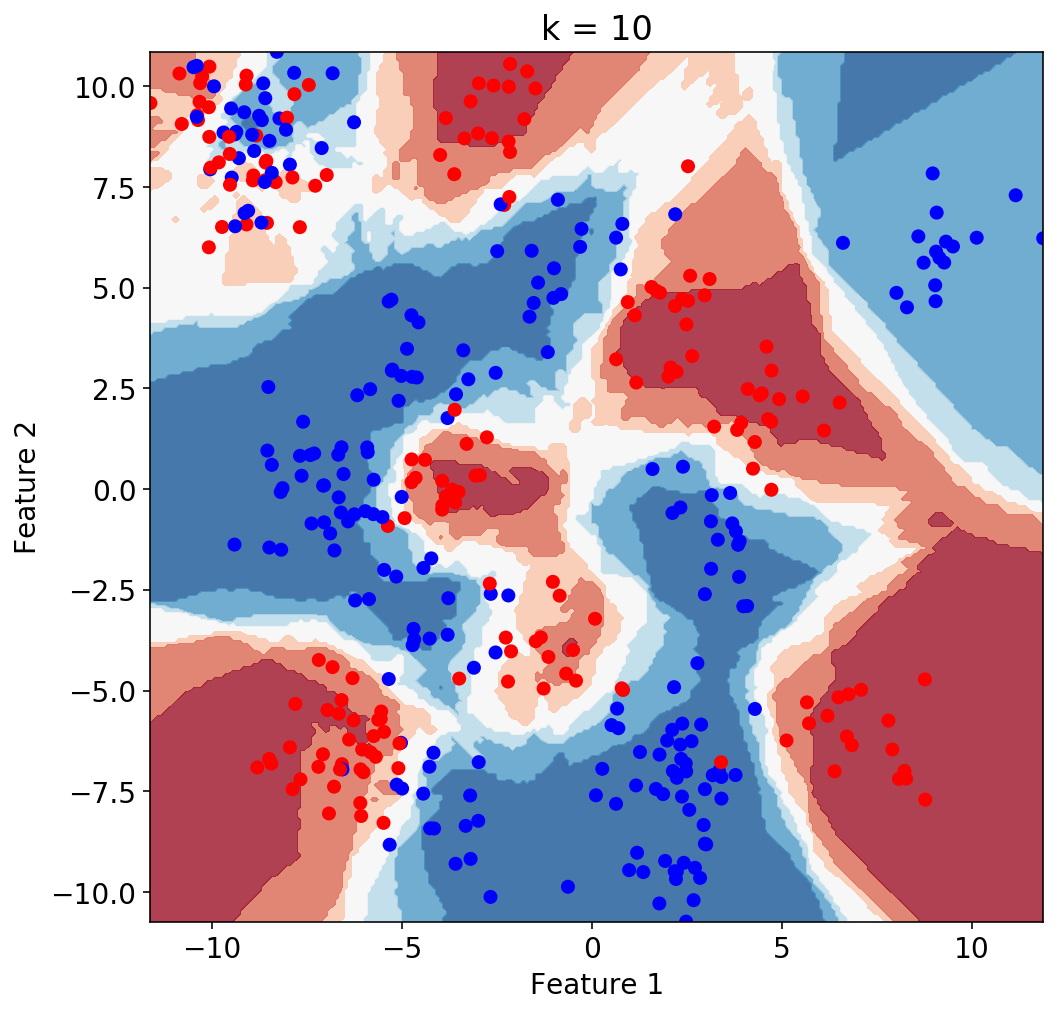

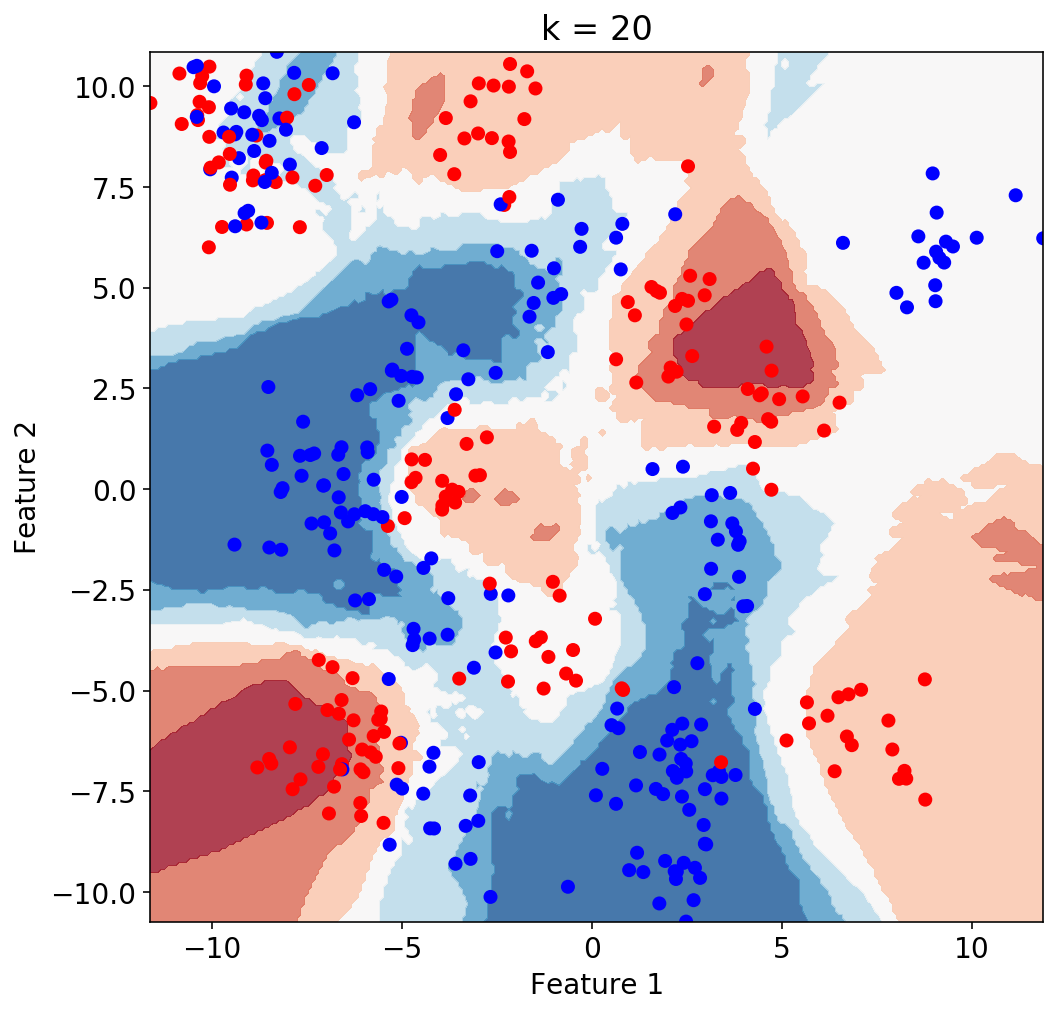

In [23]:
for k in (1, 3, 5, 10, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    utils.plot_surface(clf, X, y, show=False)
    #plt.title("k = %i, score=%.2f" % (k, clf.score(X_test, y_test)))
    plt.title("k = %i" % k)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show();

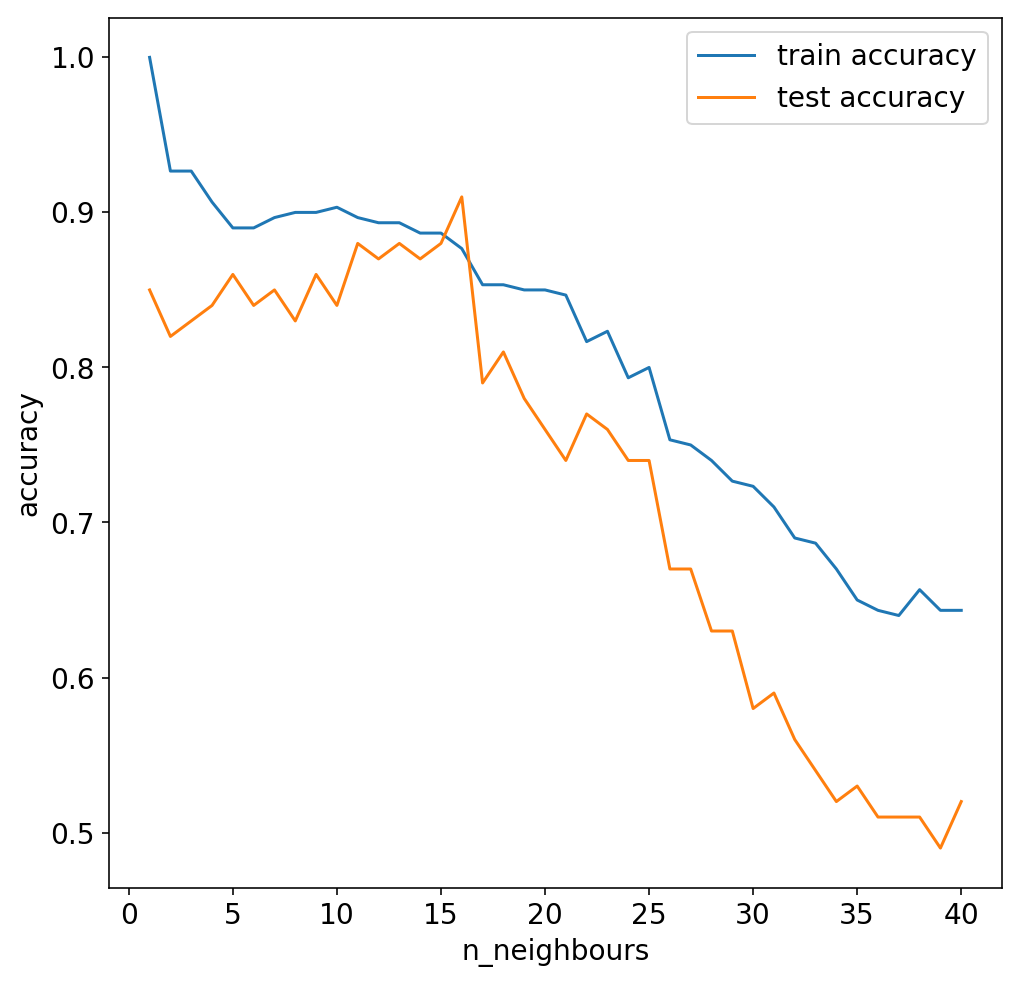

In [24]:
train_acc = []
test_acc = []
K = range(1, 41)

for k in K:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(K, train_acc, label='train accuracy')
plt.plot(K, test_acc, label='test accuracy')
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
plt.legend(loc='best');

In [32]:
from sklearn.metrics import classification_report

X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = y<10

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.86      0.86      0.86        51
       True       0.86      0.86      0.86        49

avg / total       0.86      0.86      0.86       100



In [36]:
y_pred = knn.predict_proba(X_test)[:, 1] > 0.8
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.70      0.94      0.80        51
       True       0.90      0.57      0.70        49

avg / total       0.80      0.76      0.75       100

